In [37]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

import seaborn as sns
from sklearn.datasets import make_blobs  #to generate clustered data

In [38]:
X, y = make_blobs(
    n_samples=1000,
    n_features=2,
    centers=4,
    random_state=42
)

<Axes: >

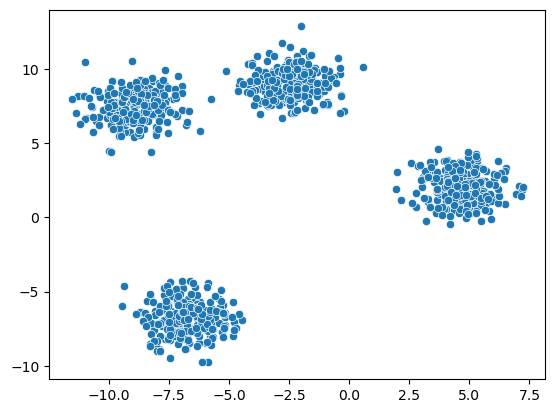

In [39]:
# Visualize 
sns.scatterplot(x=X[:,0], y=X[:,1])

In [40]:
# K-means algo
from sklearn.cluster import KMeans

In [41]:
K = 4

kmeans = KMeans(
    n_clusters=K,
    init='k-means++',
    random_state=42
)

In [42]:
labels = kmeans.fit_predict(X)
#label = cluster numbers

<Axes: >

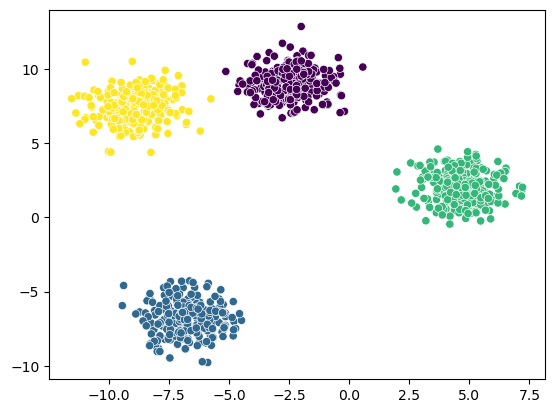

In [43]:
# now creating the plot with labels which we created
sns.scatterplot(x=X[:,0], y=X[:,1], c=labels)

# Choose our K value - Elbow, Silhoutte Score

In [44]:
# Elbow method

wcss=[]
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)  # Here we get the inertia which we append in the wcss list we created above
    

<Axes: >

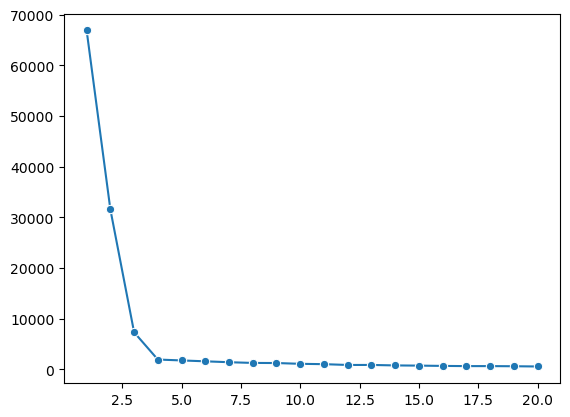

In [45]:
# Plotting k v/s wcss 
sns.lineplot(x=range(1, 21), y=wcss, marker='o')  #where x=k, y=wcss

In [46]:
# Automatic way to do elbow method using kneed module
!pip install kneed

Defaulting to user installation because normal site-packages is not writeable


In [47]:
from kneed import KneeLocator

In [48]:
knee = KneeLocator(range(1,21), wcss, curve="convex", direction="decreasing")
print("k = ", knee.elbow)

k =  4


In [49]:
# Silhouette Score

from sklearn.metrics import silhouette_score

In [50]:
ss=[]
for k in range(2, 21):
    kmeans=KMeans(n_clusters=k)
    labels=kmeans.fit_predict(X)
    ss.append(silhouette_score(X, labels))

<Axes: >

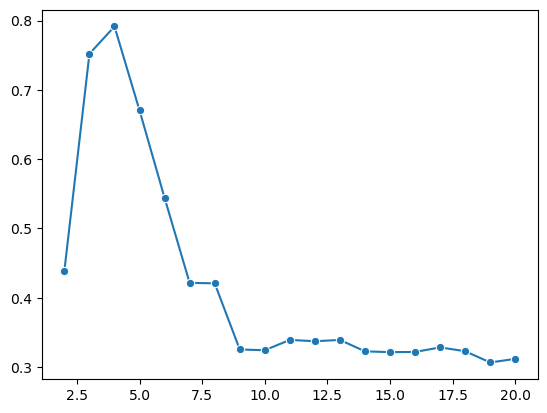

In [51]:
# Plotting k v/s ss
sns.lineplot(x=range(2,21), y=ss, marker="o")


In [52]:
# K-Means on Iris Dataset
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd

In [53]:
df = load_iris()
X = df.data
y = df.target

In [54]:
X.shape

(150, 4)

<Axes: >

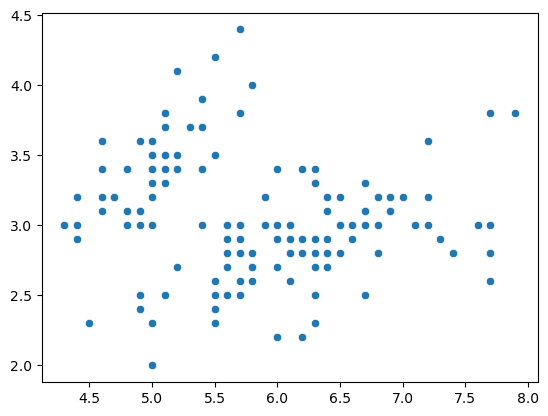

In [60]:
#Visualize
sns.scatterplot(x=X[:,0], y=X[:,1])

In [61]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scale = scaler.fit_transform(X)

In [62]:
#Elbow method 
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit_predict(X_scale)
    wcss.append(kmeans.inertia_)

<Axes: >

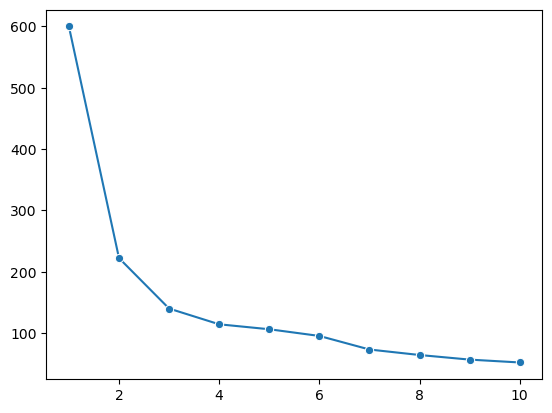

In [63]:
sns.lineplot(x=range(1,11), y=wcss, marker="o")

<Axes: >

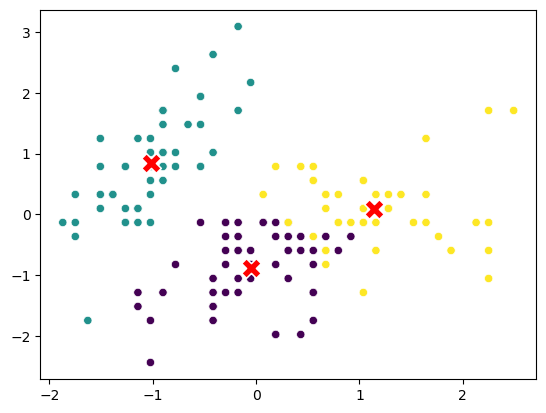

In [79]:
kmeans = KMeans(n_clusters=3)
#Here we have created our labels and plotted them 
labels = kmeans.fit_predict(X_scale)

sns.scatterplot(x=X_scale[:,0], y=X_scale[:,1], c=labels)
# Here we have printed the centroids
sns.scatterplot(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], marker="X", c="red", s=200)